<a href="https://colab.research.google.com/github/mafazann/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama  : M. Rizky Mafazan
### Kelas : 3F - TI
### NIM   : 2141720140

## TUGAS PRAKTIKUM

 1. Import folder yang ada di Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytesseract

2. Import beberapa library

In [3]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

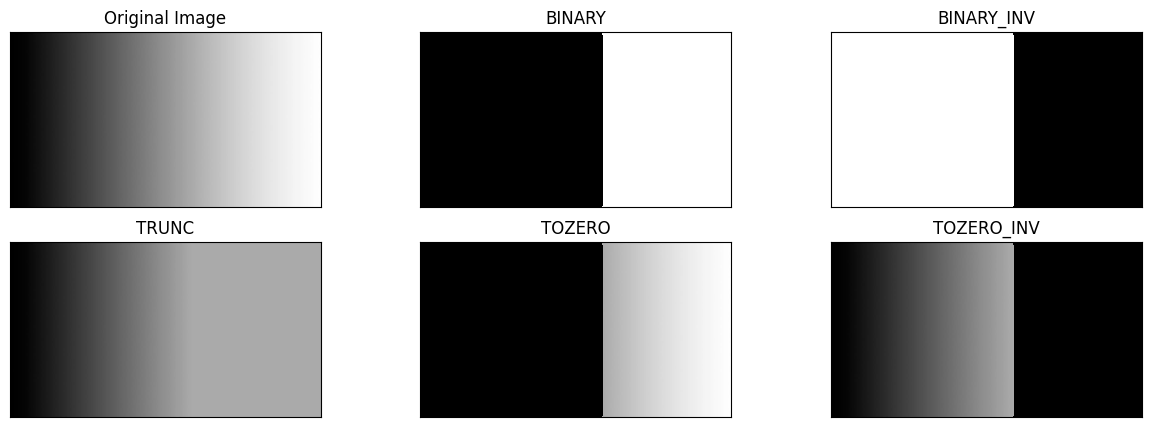

In [4]:
filename = ('/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg')
img = cv.imread(filename)

thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255 #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1 #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

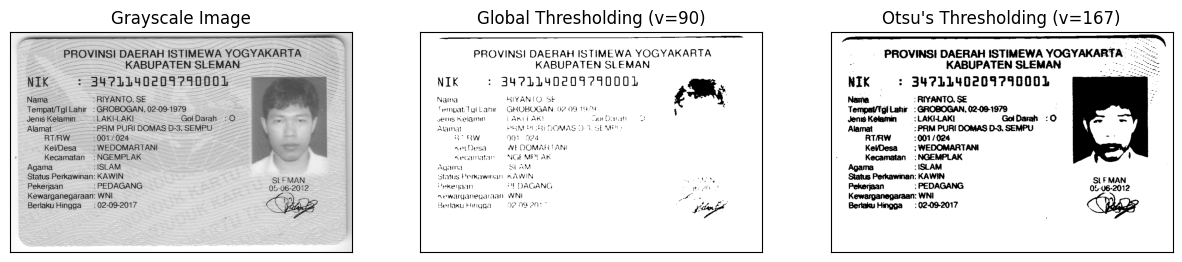

In [5]:
# Load the image using cv2 in grayscale
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP_Riyanto.jpg', cv.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to the image
blur = cv.GaussianBlur(img,(5,5),0)

# Set the global threshold value
thresh_global = 90

# Apply global thresholding
global_thresh = blur.copy()
global_thresh[blur > thresh_global] = 255
global_thresh[blur <= thresh_global] = 0

# Set the specific threshold value for Otsu's thresholding
thresh_otsu = 167

# Apply Otsu's thresholding
otsu_thresh = blur.copy()
otsu_thresh[blur > thresh_otsu] = 255
otsu_thresh[blur <= thresh_otsu] = 0

# Display the images
titles = ['Grayscale Image', 'Global Thresholding (v=90)', f"Otsu's Thresholding (v={thresh_otsu})"]
images = [img, global_thresh, otsu_thresh]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.

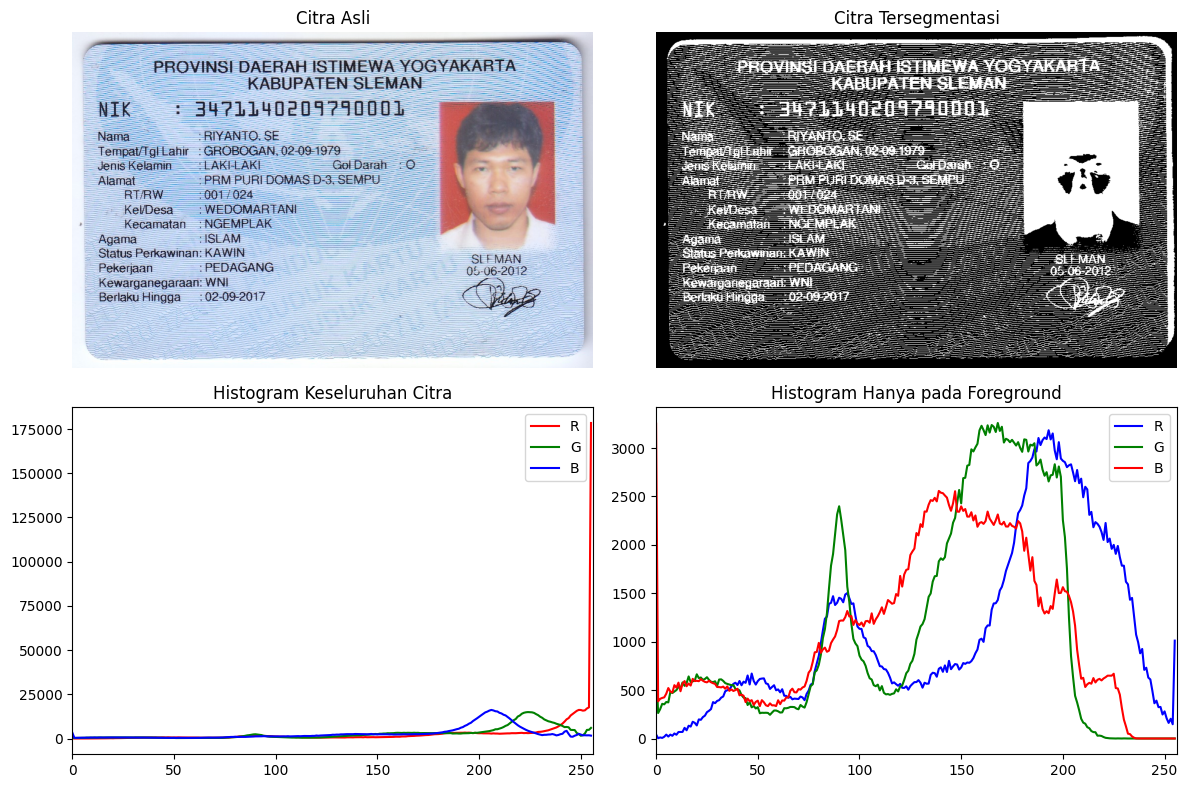

In [9]:
import cv2

# Load gambar
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP_Riyanto.jpg', cv.IMREAD_COLOR)

# Ubah ke grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Menerapkan threshold untuk mendapatkan citra tersegmentasi
_, thresholded = cv.threshold(gray_img, 200, 255, cv.THRESH_BINARY_INV)

# Buat mask untuk citra tersegmentasi
mask = np.zeros(gray_img.shape, dtype=np.uint8)
mask[thresholded == 255] = 255

# Hitung histogram citra asli untuk setiap saluran warna
hist_full_r = cv.calcHist([img], [0], None, [256], [0, 256])
hist_full_g = cv.calcHist([img], [1], None, [256], [0, 256])
hist_full_b = cv.calcHist([img], [2], None, [256], [0, 256])

# Hitung histogram citra tersegmentasi untuk setiap saluran warna
hist_segmented_r = cv.calcHist([img], [0], mask, [256], [0, 256])
hist_segmented_g = cv.calcHist([img], [1], mask, [256], [0, 256])
hist_segmented_b = cv.calcHist([img], [2], mask, [256], [0, 256])

# Tampilkan gambar dan histogram
plt.figure(figsize=(12, 8))

# Tampilkan citra asli dan citra tersegmentasi
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Tersegmentasi')
plt.axis('off')

# Tampilkan histogram keseluruhan citra untuk setiap saluran warna
plt.subplot(2, 2, 3)
plt.plot(hist_full_r, color='red')
plt.plot(hist_full_g, color='green')
plt.plot(hist_full_b, color='blue')
plt.title('Histogram Keseluruhan Citra')
plt.xlim([0, 256])
plt.legend(['R', 'G', 'B'])

# Tampilkan histogram hanya pada foreground untuk setiap saluran warna
plt.subplot(2, 2, 4)
plt.plot(hist_segmented_r, color='blue')
plt.plot(hist_segmented_g, color='green')
plt.plot(hist_segmented_b, color='red')
plt.title('Histogram Hanya pada Foreground')
plt.xlim([0, 256])
plt.legend(['R', 'G', 'B'])

# Atur tata letak plot
plt.tight_layout()

# Tampilkan plot
plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7e084208e4d0>)

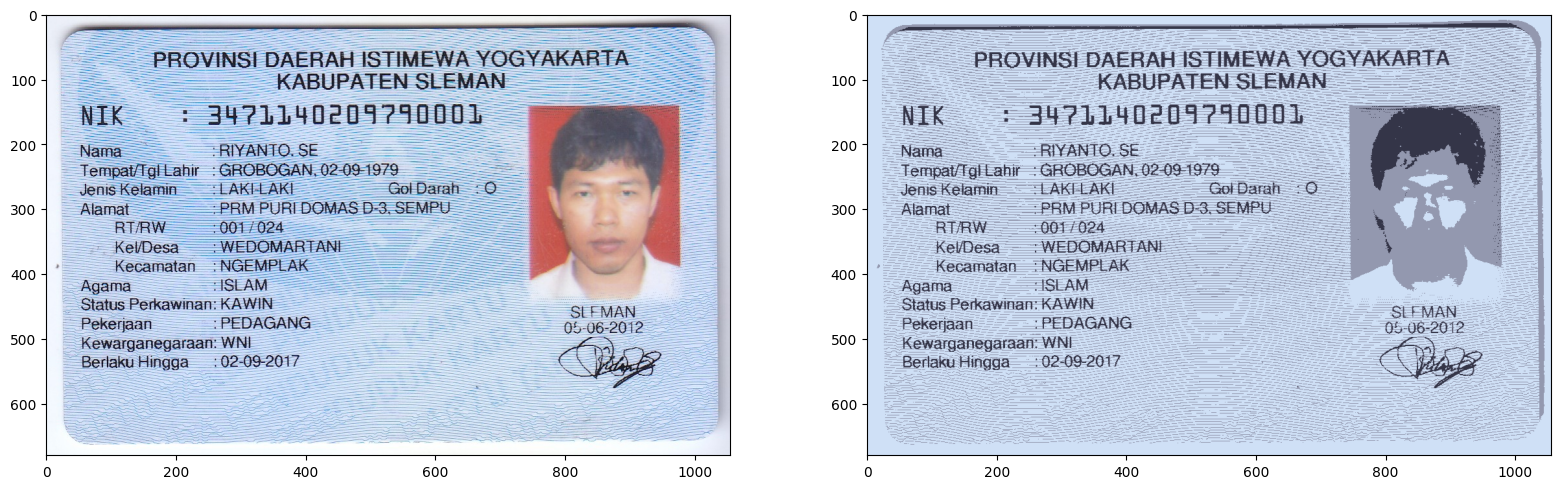

In [11]:
# Load the image using cv2 in RGB
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP_Riyanto.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = img.reshape((-1, 3))

# Convert to floating point
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv.kmeans(pixels, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Map the labels to the centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image
segmented_image = segmented_image.reshape(img.shape)


plt.figure(figsize=(30,30))
plt.subplot(1,3,1),plt.imshow(img)

plt.subplot(1,3,2),plt.imshow(segmented_image)


E. proses konversi gambar KTP menjadi teks yang dapat mengenali
tulisan

In [12]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (12.8 MB/s)
debconf: unable to init

In [31]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [29]:
from pytesseract import Output
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP_Riyanto.jpg')
text1 = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


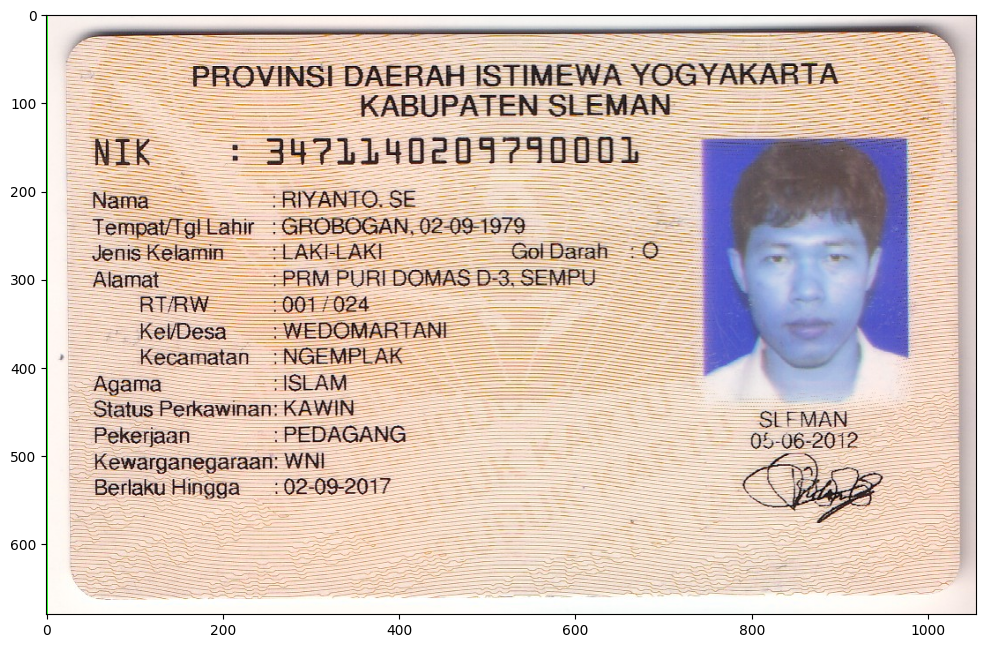

In [30]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
     (x, y, w, h) = (text1['left'][i], text1['top'][i],
text1['width'][i], text1['height'][i])
img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,
255, 0), 2)
display(img)